In [ ]:
library(dplyr)
library("MatchIt")
data <- read.csv('before_matching_list.csv', header = TRUE,sep = ',',)
data <- data[data$kenshin_times >= 1, ]

# 1:1 NN PS matching w/o replacement
m.out1 <- matchit(is_mac ~ age + sex + period + kenshin_times + months_until_first_kenshin + durling_DM,
                  data = data,
                 method = "nearest", distance = "glm")

# Checking balance after NN matching
summary(m.out1, un = FALSE)
plot(summary(m.out1),xlim = c(0, 0.6))

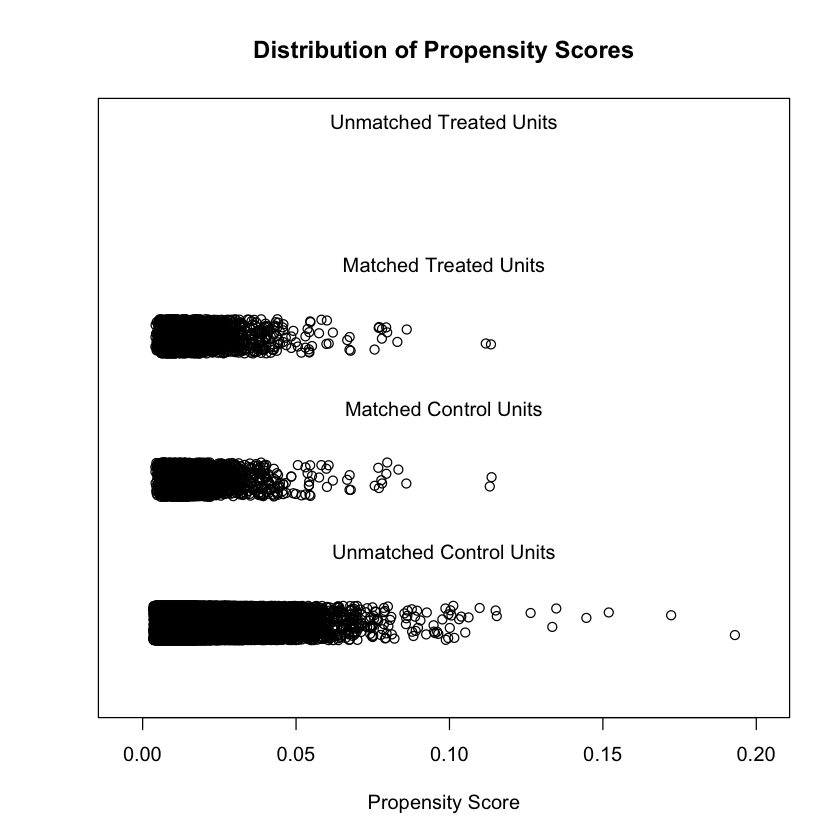

In [3]:
plot(m.out1, type = "jitter", interactive = FALSE)

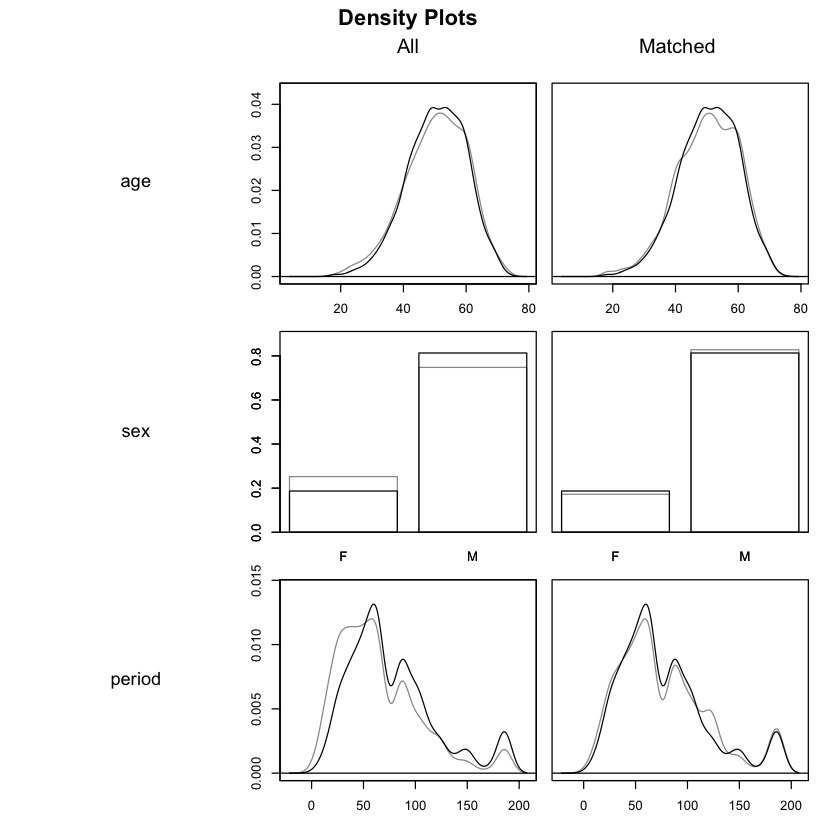

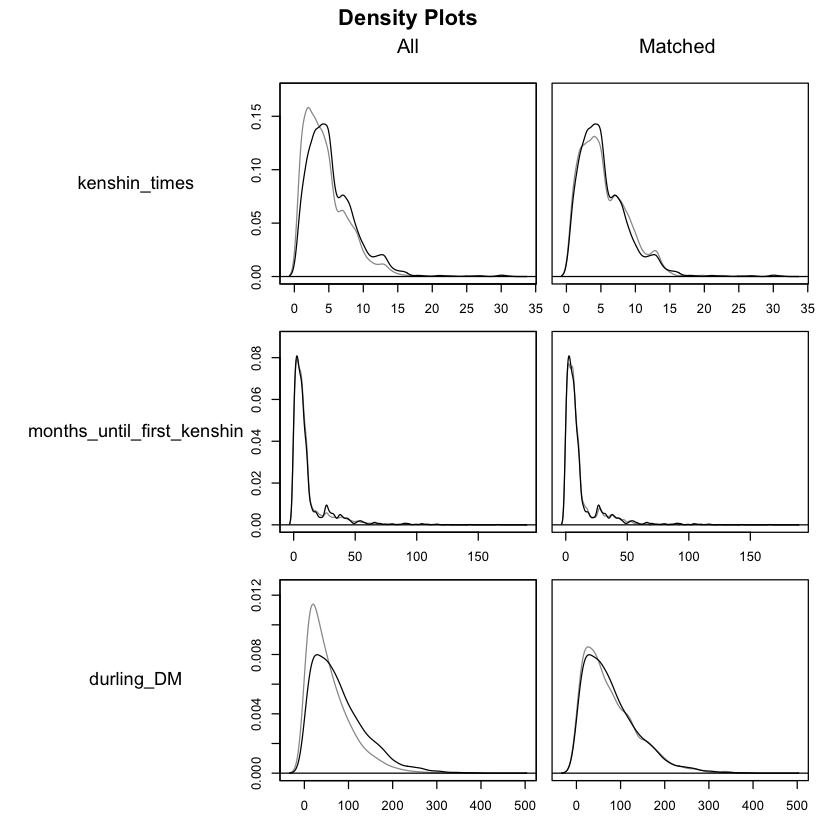

In [4]:
plot(m.out1, type = "density", interactive = FALSE,
     which.xs = ~age + sex + period + kenshin_times + months_until_first_kenshin + durling_DM)

In [6]:
matched_data <- match.data(m.out1)
matched_data <- matched_data[order(matched_data$subclass), ]

write.csv(matched_data, "matched_list.csv")